<a href="https://colab.research.google.com/github/Fa-commits/BINA/blob/main/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Requirements


In [2]:
import pandas as pd

In [3]:
pip install pyaxis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyaxis: filename=pyaxis-0.4.0-py3-none-any.whl size=14681 sha256=27dbcb457d4a96d4122a876a21bbe10f49657c6e3942cec17cf31b63d8c02bf4
  Stored in directory: /root/.cache/pip/wheels/e1/4b/58/bc6338703796f8330393829e1b993abd5dd8bf5d1fa8897c0f
  Created wheel for pyjstat: filename=pyjstat-2.4.0-py3-none-any.whl size=22763 sha256=1125050ce28803da7f5879cb747507de50f5cda65a9f759b7c37764296bffca4
  Stored in directory: /root/.cache/pip/wheels/d7/b0/ac/350c026feabb6a22b2a5b3fb1f694e724c0f57c2c43ccaf738
Successfully built pyaxis pyjstat


# Arbeitsstätten und Beschäftigte nach Jahr, Gemeinde, Wirtschaftssektor und Beobachtungseinheit

In [4]:
import pandas as pd
import requests
import itertools

# URL der Datenquelle
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602010000_102/px-x-0602010000_102.px"

# Funktion zum Abrufen der Daten für eine bestimmte Kombination von Parametern
def fetch_data(years, wirtschaftssektoren, beobachtungseinheiten):
    query = {
        "query": [
            {
                "code": "Jahr",
                "selection": {
                    "filter": "item",
                    "values": years
                }
            },
            {
                "code": "Wirtschaftssektor",
                "selection": {
                    "filter": "item",
                    "values": wirtschaftssektoren
                }
            },
            {
                "code": "Beobachtungseinheit",
                "selection": {
                    "filter": "item",
                    "values": beobachtungseinheiten
                }
            }
        ],
        "response": {
            "format": "json-stat2"
        }
    }
    response = requests.post(url, json=query)
    return response.json()

# Parameter für die Abfrage
years = ["2020", "2021", "2022"]
wirtschaftssektoren = ["999", "1", "2", "3"]
beobachtungseinheiten = ["5", "6", "7"]

# Daten abrufen
data = fetch_data(years, wirtschaftssektoren, beobachtungseinheiten)

# DataFrame erstellen
df = pd.DataFrame(columns=["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit", "Wert"])

# Hilfsfunktion zur Berechnung des Produkts einer Liste
def prod(iterable):
    result = 1
    for x in iterable:
        result *= x
    return result

# Daten extrahieren und in DataFrame einfügen
dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit"]
df = pd.DataFrame(columns=dimensions + ["Wert"])

sizes = [len(data["dimension"][dim]["category"]["index"]) for dim in dimensions]

for combination in itertools.product(*[data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
    index = 0
    for i, val in enumerate(combination):
        # Konvertiere den String-Index in einen Integer
        dim_index = int(data["dimension"][dimensions[i]]["category"]["index"][val])
        index += dim_index * prod(sizes[i+1:])

    value = data["value"][index]

    row = dict(zip(dimensions, combination))
    row["Wert"] = value
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# Ersetze die Codes durch ihre Beschreibungen
for dim in dimensions:
    df[dim] = df[dim].map(data["dimension"][dim]["category"]["label"])

# Aufteilen der Gemeinde-Spalte in PLZ und Ort
df[['PLZ', 'Ort']] = df['Gemeinde'].str.split(' ', n=1, expand=True)

# Optional: Die ursprüngliche Gemeinde-Spalte entfernen
df = df.drop(columns=['Gemeinde'])

# DataFrame anzeigen
print(df)


       Jahr          Wirtschaftssektor         Beobachtungseinheit     Wert  \
0      2020  Wirtschaftssektor - Total         Vollzeitäquivalente  4119202   
1      2020  Wirtschaftssektor - Total  Vollzeitäquivalente Frauen  1619409   
2      2020  Wirtschaftssektor - Total  Vollzeitäquivalente Männer  2499792   
3      2020               Primärsektor         Vollzeitäquivalente   102575   
4      2020               Primärsektor  Vollzeitäquivalente Frauen    27759   
...     ...                        ...                         ...      ...   
77251  2022          Sekundärer Sektor  Vollzeitäquivalente Frauen     None   
77252  2022          Sekundärer Sektor  Vollzeitäquivalente Männer     None   
77253  2022           Tertiärer Sektor         Vollzeitäquivalente      172   
77254  2022           Tertiärer Sektor  Vollzeitäquivalente Frauen      111   
77255  2022           Tertiärer Sektor  Vollzeitäquivalente Männer       61   

           PLZ         Ort  
0      Schweiz        

In [5]:
print(df)

       Jahr          Wirtschaftssektor         Beobachtungseinheit     Wert  \
0      2020  Wirtschaftssektor - Total         Vollzeitäquivalente  4119202   
1      2020  Wirtschaftssektor - Total  Vollzeitäquivalente Frauen  1619409   
2      2020  Wirtschaftssektor - Total  Vollzeitäquivalente Männer  2499792   
3      2020               Primärsektor         Vollzeitäquivalente   102575   
4      2020               Primärsektor  Vollzeitäquivalente Frauen    27759   
...     ...                        ...                         ...      ...   
77251  2022          Sekundärer Sektor  Vollzeitäquivalente Frauen     None   
77252  2022          Sekundärer Sektor  Vollzeitäquivalente Männer     None   
77253  2022           Tertiärer Sektor         Vollzeitäquivalente      172   
77254  2022           Tertiärer Sektor  Vollzeitäquivalente Frauen      111   
77255  2022           Tertiärer Sektor  Vollzeitäquivalente Männer       61   

           PLZ         Ort  
0      Schweiz        

In [77]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame called 'df'

# Load Switzerland's geographical data
switzerland = gpd.read_file('/content/gemeinden.geojson')

merged_data = switzerland.merge(df, left_on='gemeinde.NAME', right_on='Ort', how="left")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Wert', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True)

# Remove axis
ax.axis('off')

# Add a title
plt.title('Heatmap of Switzerland based on Economic Data', fontsize=16)

plt.show()


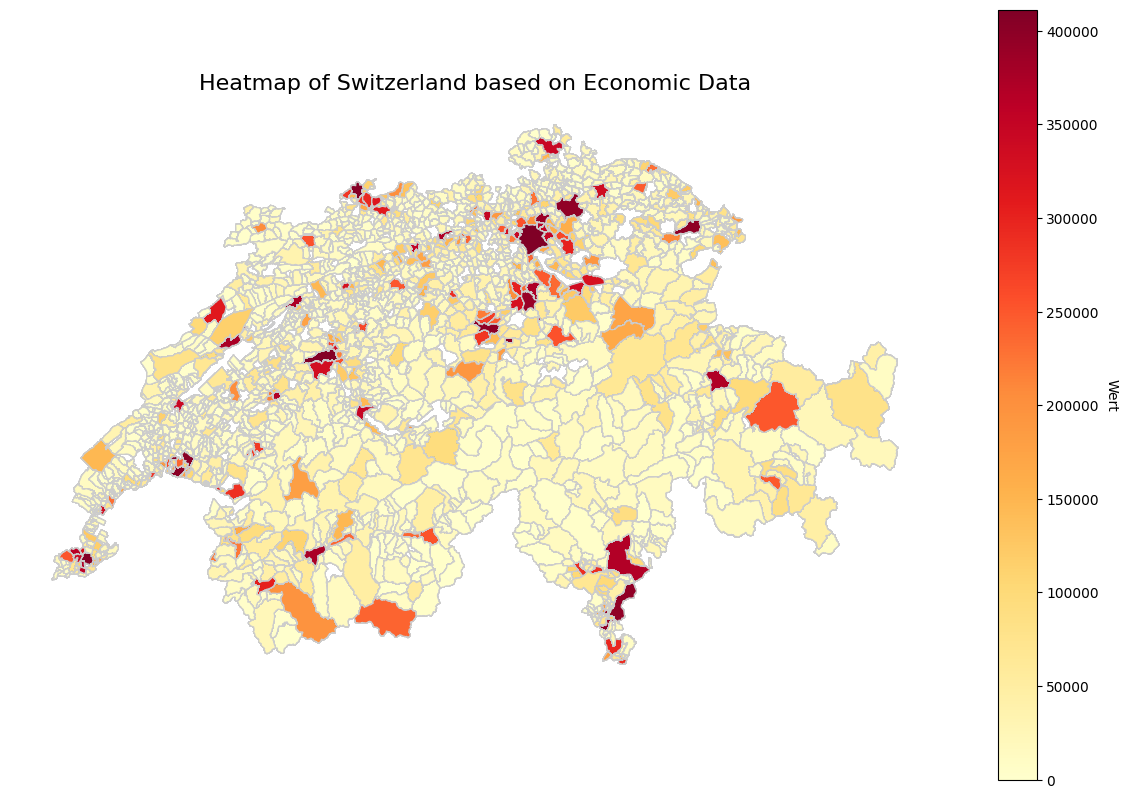

In [81]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Remaping df to c_df
c_df = df.dropna(subset=['Ort'])

# Load Switzerland's geographical data
switzerland = gpd.read_file('/content/gemeinden.geojson')

merged_data = switzerland.merge(c_df, left_on='gemeinde.NAME', right_on='Ort', how="left")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create the plot
im = merged_data.plot(column='Wert', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', ax=ax, legend=False)

# Remove axis
ax.axis('off')

# Add a title
plt.title('Heatmap of Switzerland based on Economic Data', fontsize=16)

# Create colorbar
norm = Normalize(vmin=merged_data['Wert'].min(), vmax=merged_data['Wert'].max())
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Wert', rotation=-90, va="bottom")

plt.show()
